In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

data = pd.read_csv('data/sentiment.csv', index_col=0)
data = data.drop(columns=['Text'])
data.head()

,Change In Price,Favorites,Retweets,Negative,Neutral,Positive,Compound
2020-01-27,3.205994,6544.600000,814.000000,0.028,0.863,0.109,0.7959
2020-01-28,-0.318001,79576.500000,6452.666667,0.000,0.829,0.171,0.8718
2020-01-29,1.059998,35996.769231,4025.000000,0.027,0.755,0.218,0.9715
2020-01-30,1.678001,53946.166667,4608.000000,0.108,0.868,0.024,-0.5707
2020-01-31,2.113998,53814.944444,5062.500000,0.040,0.757,0.203,0.9657


In [34]:
model = LinearRegression()
X = data[["Favorites", "Retweets", "Negative", "Neutral", "Positive", "Compound"]]
Y = data["Change In Price"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions) 
print(error)

215.83822320152444


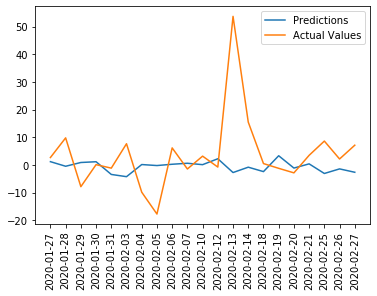

In [35]:
plt.plot(data.index[:len(predictions)], predictions)
plt.plot(data.index[:len(y_test)], y_test)
plt.xticks(rotation=90)
plt.legend(["Predictions","Actual Values"])
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X = data[["Favorites", "Retweets", "Negative", "Neutral", "Positive", "Compound"]]
Y = data["Change In Price"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
rf = RandomForestRegressor(n_estimators = 10000, random_state=0, bootstrap=True)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
error = mean_squared_error(y_test, predictions) 
print(error)

169.99395212582905


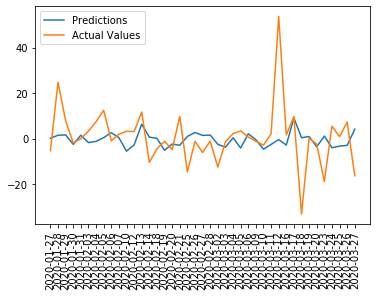

In [50]:
plt.plot(data.index[:len(predictions)], predictions)
plt.plot(data.index[:len(y_test)], y_test)
plt.xticks(rotation=90)
plt.legend(["Predictions","Actual Values"])
plt.show()